# <span style="color:green"> Numerical Simulation Laboratory (NSL) </span>
## <span style="color:blue">  Numerical exercises 5</span> - <span style="color:red"> Only for master students</span>


In quantum physics a **wave function**, $\Psi$, is a mathematical description of the state of a quantum system. The wave function is a complex-valued probability amplitude, and the probabilities for the possible results of measurements made on the system can be derived from it.

For now on, let's consider the simple case of a non-relativistic single particle, without spin, in three spatial dimensions. The state of such a particle is completely described by its wave function, $\Psi(\vec{r},t)$, where $\vec{r}$ is position and $t$ is time.

For one spinless particle, if the wave function is interpreted as a probability amplitude, the square modulus of the wave function, $|\Psi(\vec{r},t)|^2$, is interpreted as the probability density that the particle is at $\vec{r}$ at time $t$. Once we have a probability density, we can use Monte Carlo ...

#### Hydrogen atom
The wave functions of the eigenstates of an electron in a Hydrogen atom (this is the only atom for which the Schroedinger equation has been solved exactly) are expressed in terms of spherical harmonics and generalized Laguerre polynomials. It is convenient to use spherical coordinates, and the wave function can be separated into functions of each coordinate:

$$
\Psi_{n,l,m}(r,\theta,\phi)=
\sqrt{\left(\frac{2}{na_0}\right)^3 \frac{(n-l-1)!}{2n[(n+l)!]}}
e^{-r/na_0}\left(\frac{2r}{na_0}\right)^l L_{n-l-1}^{2l+1}\left(\frac{2r}{na_0}\right)
Y_l^m(\theta,\phi)
$$

where $a_0=4\pi\epsilon_0\hbar^2/m_e e^2=0.0529$ nm is the Bohr radius, $L_{n-l-1}^{2l+1}$ are the generalized Laguerre polynomials of degree $n-l-1$, $n=1,2,...$ is the principal quantum number, $l=0,1, ..., n-1$ the azimuthal quantum number, $m=-l, -l+1, ..., l-1, l$ the magnetic quantum number.

For example, the ground state wave function is:
$$
\Psi_{1,0,0}(r,\theta,\phi)=
\frac{a_0^{-3/2}}{\sqrt{\pi}} e^{-r/a_0} 
$$
whereas one of the three $2p$ excited state is:
$$
\Psi_{2,1,0}(r,\theta,\phi)=
\frac{a_0^{-5/2}}{8}\sqrt{\frac{2}{\pi}} r e^{-r/2a_0} \cos(\theta)
$$
<span style="color:blue">Expectation values for the radius turns out to be exactly:
$$
\left\langle r \right\rangle_{\Psi_{1,0,0}} = \frac{3}{2}a_0
\quad
\left\langle r \right\rangle_{\Psi_{2,1,0}} = 5 a_0
$$
</span>


### Exercise 05.1


Use the Metropolis algorithm to sample $|\Psi_{1,0,0}(x,y,z)|^2$ and $|\Psi_{2,1,0}(x,y,z)|^2$ **in Cartesian coordinates** using, initially, an uniform transition probability $T(\vec{x}|\vec{y})$. Use the sampled positions to estimate $\left\langle r \right\rangle_{\Psi_{1,0,0}}$ and $\left\langle r \right\rangle_{\Psi_{2,1,0}}$. As usual, use data blocking and give an estimate of the statistical uncertainties.

<span style="color:red">Show a picture of your estimations of $\left\langle r \right\rangle_{\Psi_{1,0,0}}$ and $\left\langle r \right\rangle_{\Psi_{2,1,0}}$</span> and their uncertainties with a large number of *throws* $M$ (e.g. $M\ge 10^6$) as a function of the number of blocks, $N$</font>.

- Use Bohr radius units, $a_0$ for distances
- Choose the step of the uniform transition probability $T(\vec{x}|\vec{y})$ in order to obtain 50% of acceptance in both cases
- Choose a reasonable starting point in the 3D space and equilibrate your sampling before to start measuring the radius. What do you observe when you start very far from the origin?
- How large should be the number of Monte Carlo Metropolis steps in each block?
- <span style="color:red">If you use a multivariate normal transition probability $T(\vec{x}|\vec{y})$, i.e. a Gaussian for each coordinate, your results for $\left\langle r \right\rangle_{\Psi_{1,0,0}}$ and $\left\langle r \right\rangle_{\Psi_{2,1,0}}$ are equivalent?</span>

You can use a Python code similar to the following one to observe how the sampled points distribute into the 3D space:

In [59]:
#Importo tutte le librerie necessarie

import numpy as np # Libreria per la manipolazione di array e calcoli matematici
import pandas as pd # Libreria per la manipolazione e l'analisi di dati
import matplotlib.pyplot as plt  # Libreria per la creazione di grafici

In [60]:
#Figure più leggibili

# Imposto le dimensioni del titolo dell'asse
plt.rcParams['axes.titlesize'] = 16

# Imposto le dimensioni delle etichette dell'asse
plt.rcParams['axes.labelsize'] = 14

# Imposto le dimensioni della legenda
plt.rcParams['legend.fontsize'] = 12

# Imposto le dimensioni dei tick sull'asse x
plt.rcParams['xtick.labelsize'] = 12

# Imposto le dimensioni dei tick sull'asse y
plt.rcParams['ytick.labelsize'] = 12

# Disabilito le linee del bordo destro degli assi
plt.rcParams['axes.spines.right'] = False

# Disabilito le linee del bordo superiore degli assi
plt.rcParams['axes.spines.top'] = False

# Imposto la griglia
plt.rcParams['axes.grid'] = True

In [141]:
# Carico i dati dai file in dataFrame pandas
pos_f_u = pd.read_csv("pos_f_u.xyz", sep = "\s+", index_col = False, skiprows = 0, names = ["x", "y", "z"])
r_f_u = np.array(pd.read_csv("r_f_u.txt", index_col = False, skiprows = 0, names = ["media", "errore"]))

pos_e_u = pd.read_csv("pos_e_u.xyz", sep = "\s+", index_col = False, skiprows = 0, names = ["x", "y", "z"])
r_e_u = np.array(pd.read_csv("r_e_u.txt", index_col = False, skiprows = 0, names = ["media", "errore"]))

pos_f_m = pd.read_csv("pos_f_m.xyz", sep = "\s+", index_col = False, skiprows = 0, names = ["x", "y", "z"])
r_f_m = np.array(pd.read_csv("r_f_m.txt", index_col = False, skiprows = 0, names = ["media", "errore"]))

pos_e_m = pd.read_csv("pos_e_m.xyz", sep = "\s+", index_col = False, skiprows = 0, names = ["x", "y", "z"])
r_e_m = np.array(pd.read_csv("r_e_m.txt", index_col = False, skiprows = 0, names = ["media", "errore"]))

In [142]:
# Imposto i parametri
M = 1000000 # Numero di estrazioni 
N = 100 # Numero di blocchi
L = int(M/N) # Numero di step per blocco
x = np.arange(N) # Genero gli indici dell'asse x

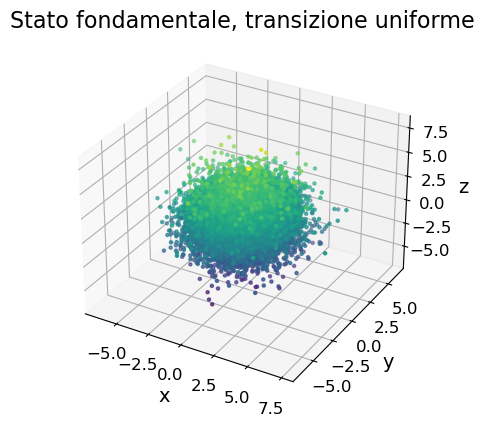

In [143]:
# Faccio un plot 3D delle posizioni campionate con l'algoritmo di Metropolis per visualizzare l'orbitale

fig = plt.figure()
ax = fig.add_subplot(projection='3d')
ax.scatter(pos_f_u.x, pos_f_u.y, pos_f_u.z, c = pos_f_u.z, marker = '.')

ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')

plt.title("Stato fondamentale, transizione uniforme")

plt.show()

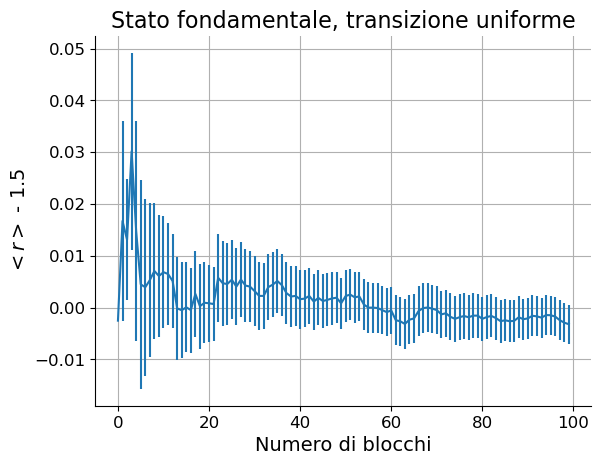

In [144]:
# Creo il grafico a barre con errori della distanza dall'origine in funzione dei blocchi
plt.errorbar(x, r_f_u[:,0] - 1.5, yerr = r_f_u[:,1])

# Etichette degli assi
plt.xlabel('Numero di blocchi')
plt.ylabel(r'$<r>$ - 1.5')

# Titolo
plt.title("Stato fondamentale, transizione uniforme")

# Mostro il grafico
plt.show()

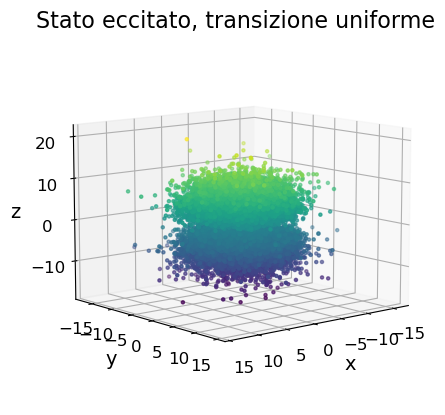

In [145]:
fig = plt.figure()
ax = fig.add_subplot(projection='3d')
ax.scatter(pos_e_u.x, pos_e_u.y, pos_e_u.z, c = pos_e_u.z, marker = '.')

ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')

ax.view_init(10, 50)

plt.title("Stato eccitato, transizione uniforme")

plt.show()

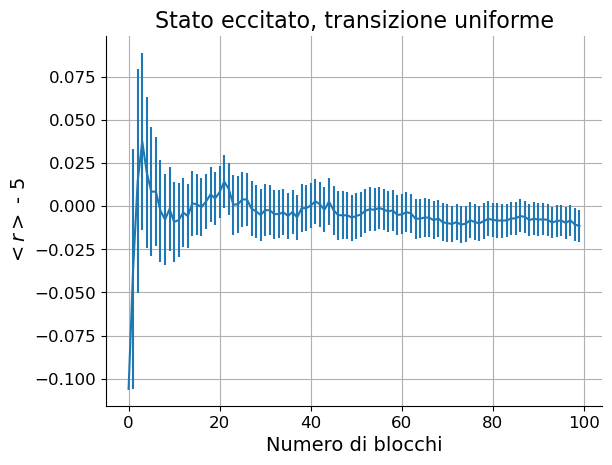

In [146]:
# Creo il grafico a barre con errori della distanza dall'origine in funzione dei blocchi
plt.errorbar(x, r_e_u[:,0] - 5, yerr = r_e_u[:,1])

# Etichette degli assi
plt.xlabel('Numero di blocchi')
plt.ylabel(r'$<r>$ - 5')

# Titolo
plt.title("Stato eccitato, transizione uniforme")

# Griglia
plt.grid(True)

# Mostro il grafico
plt.show()

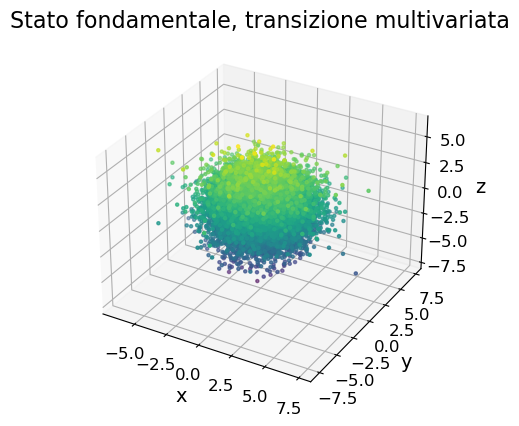

In [147]:
# Faccio un plot 3D delle posizioni campionate con l'algoritmo di Metropolis per visualizzare l'orbitale

fig = plt.figure()
ax = fig.add_subplot(projection='3d')
ax.scatter(pos_f_m.x, pos_f_m.y, pos_f_m.z, c = pos_f_m.z, marker = '.')

ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')

plt.title("Stato fondamentale, transizione multivariata")

plt.show()

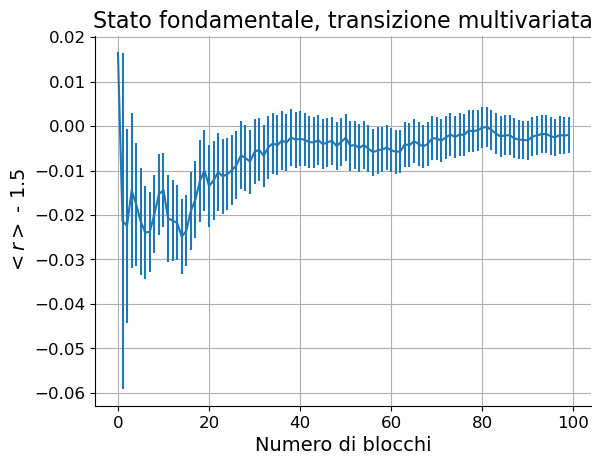

In [148]:
# Creo il grafico a barre con errori della distanza dall'origine in funzione dei blocchi
plt.errorbar(x, r_f_m[:,0] - 1.5, yerr = r_f_m[:,1])

# Etichette degli assi
plt.xlabel('Numero di blocchi')
plt.ylabel(r'$<r>$ - 1.5')

# Titolo
plt.title("Stato fondamentale, transizione multivariata")

# Griglia
plt.grid(True)

# Mostro il grafico
plt.show()

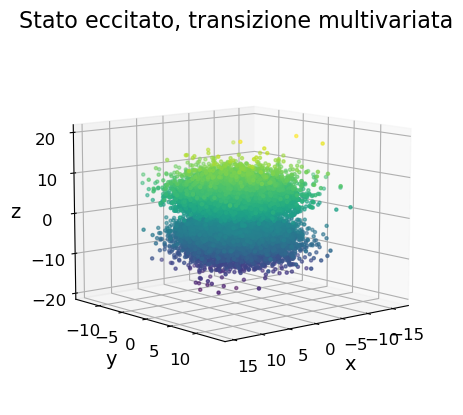

In [149]:
fig = plt.figure()
ax = fig.add_subplot(projection='3d')
ax.scatter(pos_e_m.x, pos_e_m.y, pos_e_m.z, c = pos_e_m.z, marker = '.')

ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')

ax.view_init(10, 50)

plt.title("Stato eccitato, transizione multivariata")

plt.show()

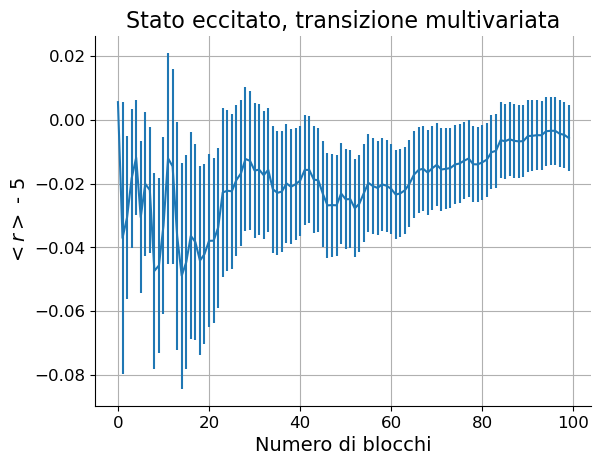

In [150]:
# Creo il grafico a barre con errori della distanza dall'origine in funzione dei blocchi
plt.errorbar(x, r_e_m[:,0] - 5, yerr = r_e_m[:,1])

# Etichette degli assi
plt.xlabel('Numero di blocchi')
plt.ylabel(r'$<r>$ - 5')

# Titolo
plt.title("Stato eccitato, transizione multivariata")

# Griglia
plt.grid(True)

# Mostro il grafico
plt.show()

Anche se parto molto lontano dall'origine, mi avvicino con pochi passi dell'algoritmo di Metropolis 

Usando la probabilità di transizione multivariata al posto di quella uniforme osservo che, modificando i parametri in modo da ottenere sempre accettazione al 50%, ottengo un'incertezza statistica maggiore.